# Python Datenvisualisierung 2
## Plotly 4
***
In diesem Notebook wird behandelt:
- Anpassung von Plotly Diagrammen
    - Farbanpassungen
    - Texte & Formen
    - Achsen & Titel
    - Legenden und Layouts
    - Templates
***

In diesem Kapitel lernst du, wie du deine Plotly-Visualisierungen anpassen und verbessern kannst. Mit den richtigen Anpassungen werden deine Diagramme nicht nur ästhetisch ansprechender, sondern auch informativer und für deine Zielgruppe besser verständlich.

## 1 Farben und Farbschemata

### Farboptionen in Plotly

Farben sind ein wesentliches Element jeder Visualisierung. Sie können verwendet werden, um:
- Verschiedene Datenserien zu unterscheiden
- Bestimmte Werte hervorzuheben
- Die Stimmung oder Bedeutung der Daten zu vermitteln
- Die Lesbarkeit und das Verständnis zu verbessern

Plotly bietet mehrere Möglichkeiten, Farben anzupassen:
- Einzelne Farbwerte (z.B. 'red', 'blue', '#FF5733')
- Farbsequenzen für numerische Werte
- Diskrete Farben für kategoriale Daten
- Vordefinierte Farbpaletten

### Beispiel 1: Grundlegende Farbanpassung

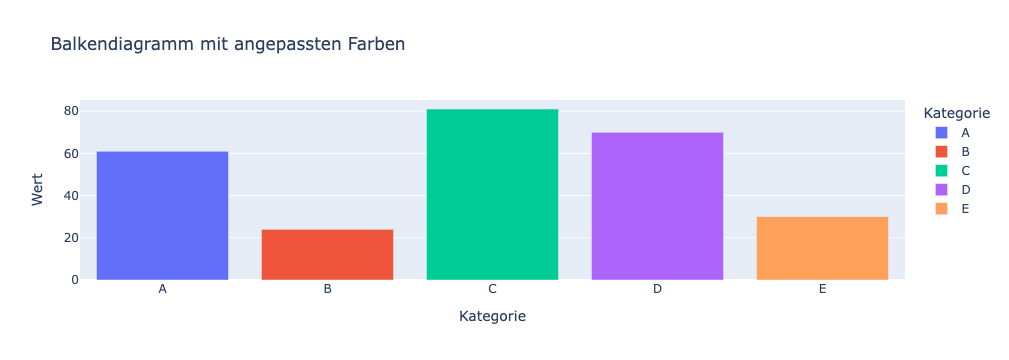

In [1]:
import plotly.express as px
import pandas as pd
import numpy as np

# Daten erstellen
np.random.seed(42)
kategorien = ['A', 'B', 'C', 'D', 'E']
werte = np.random.randint(10, 100, size=len(kategorien))

df = pd.DataFrame({'Kategorie': kategorien, 'Wert': werte})

# Einfache Farbanpassung
fig = px.bar(
    df, 
    x='Kategorie', 
    y='Wert', 
    title='Balkendiagramm mit angepassten Farben',
    color='Kategorie',  # Färben nach Kategorie
    color_discrete_sequence=['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A']  # Eigene Farbpalette
)

fig.show()

**Erklärung:**
- Mit `color='Kategorie'` weisen wir jeder Kategorie eine eigene Farbe zu
- Mit `color_discrete_sequence` definieren wir eine benutzerdefinierte Farbpalette für kategoriale Daten
- Die Farben können als Hex-Werte (#RRGGBB), RGB-Werte oder Farbnamen angegeben werden

### Beispiel 2: Fortgeschrittene Farbanpassung und Farbskalen

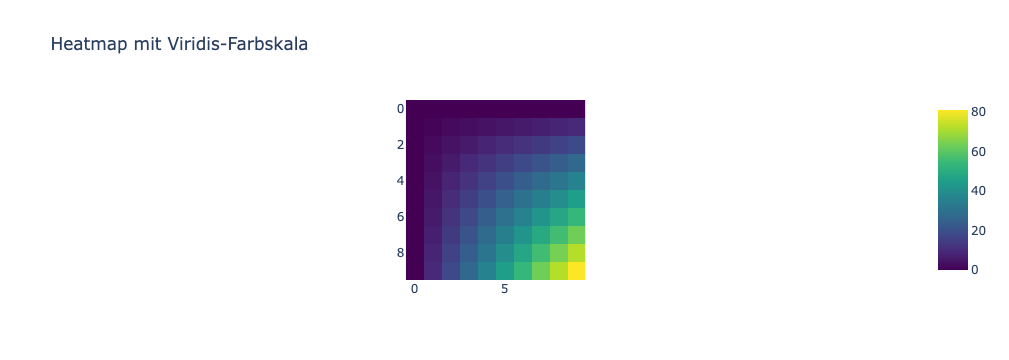

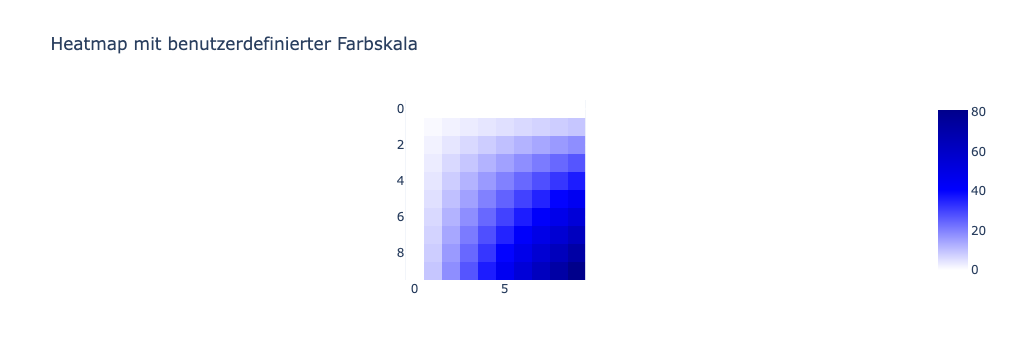

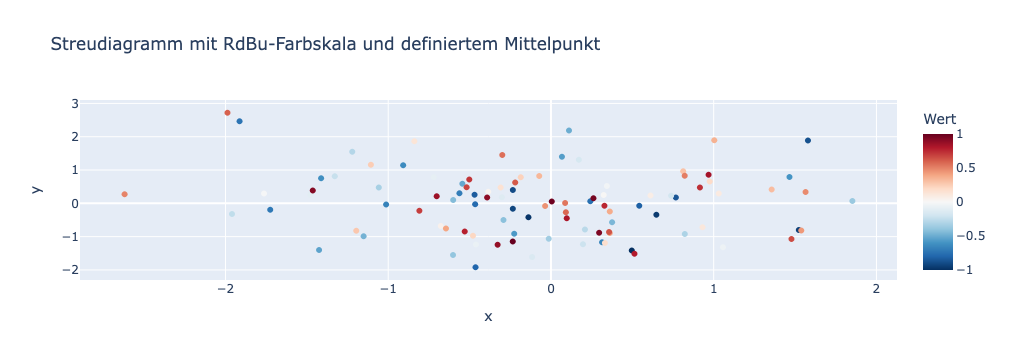

In [2]:
# Daten für Heatmap erstellen
matrix = np.outer(np.arange(10), np.arange(10))
df = pd.DataFrame(matrix)

# Heatmap mit kontinuierlicher Farbskala
fig1 = px.imshow(
    matrix,
    color_continuous_scale='Viridis',  # Vordefinierte Farbskala
    title='Heatmap mit Viridis-Farbskala'
)

# Heatmap mit benutzerdefinierter Farbskala
fig2 = px.imshow(
    matrix,
    color_continuous_scale=[[0, 'white'], [0.5, 'blue'], [1, 'darkblue']],  # Benutzerdefinierte Farbskala
    title='Heatmap mit benutzerdefinierter Farbskala'
)

# Streudiagramm mit kontinuierlicher Farbskala
np.random.seed(42)
n = 100
df = pd.DataFrame({
    'x': np.random.normal(0, 1, n),
    'y': np.random.normal(0, 1, n),
    'Wert': np.linspace(-1, 1, n)
})

fig3 = px.scatter(
    df,
    x='x',
    y='y',
    color='Wert',  # Färben nach numerischem Wert
    color_continuous_scale='RdBu_r',  # Rot-Blau-Skala (umgekehrt)
    color_continuous_midpoint=0,  # Mittelpunkt der Farbskala
    title='Streudiagramm mit RdBu-Farbskala und definiertem Mittelpunkt'
)

fig1.show()
fig2.show()
fig3.show()

**Erklärung:**
- Plotly bietet vordefinierte Farbskalen wie 'Viridis', 'Plasma', 'RdBu' usw.
- Mit `color_continuous_scale` kannst du eine vordefinierte oder eigene Farbskala auswählen
- Eine benutzerdefinierte Farbskala wird als Liste von [Position, Farbe]-Paaren definiert
- `color_continuous_midpoint` legt den Wert fest, der dem Mittelpunkt der Farbskala entspricht

### Beispiel 3: Farbmapping für kategoriale Daten

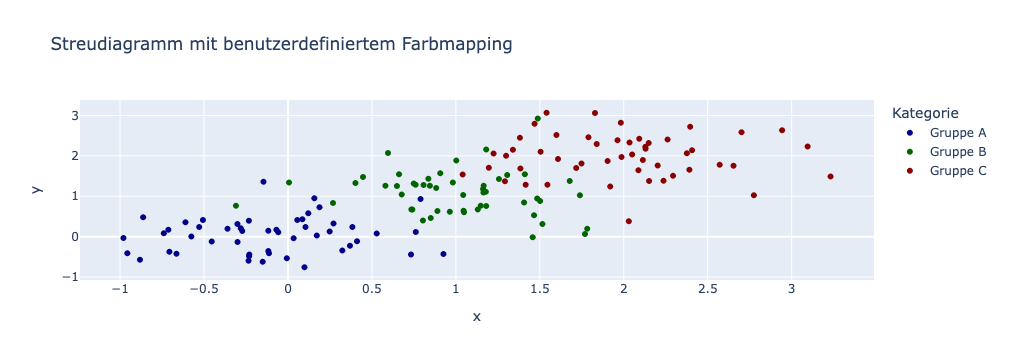

In [3]:
# Daten erstellen
np.random.seed(42)
kategorien = ['Gruppe A', 'Gruppe B', 'Gruppe C']
n_per_group = 50
df = pd.DataFrame({
    'x': np.concatenate([np.random.normal(i, 0.5, n_per_group) for i in range(len(kategorien))]),
    'y': np.concatenate([np.random.normal(i, 0.5, n_per_group) for i in range(len(kategorien))]),
    'Kategorie': np.repeat(kategorien, n_per_group)
})

# Streudiagramm mit angepasstem Farbmapping
fig = px.scatter(
    df,
    x='x',
    y='y',
    color='Kategorie',
    title='Streudiagramm mit benutzerdefiniertem Farbmapping',
    # Benutzerdefinierte Farben für jede Kategorie
    color_discrete_map={
        'Gruppe A': 'darkblue',
        'Gruppe B': 'darkgreen', 
        'Gruppe C': 'darkred'
    }
)

fig.show()

**Erklärung:**
- Mit `color_discrete_map` kannst du jeder Kategorie explizit eine Farbe zuweisen
- Dies ist besonders nützlich, wenn bestimmte Kategorien spezifische Farben haben sollten
- Du kannst Farbnamen, Hex-Werte oder RGB-Werte verwenden

## 2 Anmerkungen und Formen

### Beispiel 1: Hinzufügen von Anmerkungen

In [ ]:
# Daten erstellen
x = np.linspace(0, 10, 100)
y = np.sin(x)
df = pd.DataFrame({'x': x, 'y': y})

# Liniendiagramm erstellen
fig = px.line(
    df, 
    x='x', 
    y='y', 
    title='Sinuskurve mit Anmerkungen'
)

# Anmerkungen hinzufügen
fig.add_annotation(
    x=np.pi,  # x-Position
    y=np.sin(np.pi),  # y-Position
    text="Lokales Minimum bei π",
    showarrow=True,
    arrowhead=1,
    ax=0,
    ay=-40
)

fig.add_annotation(
    x=np.pi/2,
    y=np.sin(np.pi/2),
    text="Lokales Maximum bei π/2",
    showarrow=True,
    arrowhead=1,
    ax=0,
    ay=40
)

# Freie Textanmerkung
fig.add_annotation(
    x=8,
    y=0.6,
    text="sin(x) ist eine<br>periodische Funktion<br>mit Periode 2π",
    showarrow=False,
    bgcolor="rgba(255, 255, 255, 0.8)",
    bordercolor="gray",
    borderwidth=1
)

fig.show()

**Erklärung:**
- Mit `add_annotation` fügst du Textanmerkungen zum Diagramm hinzu
- `showarrow=True` zeigt einen Pfeil zum angegebenen Punkt
- `ax` und `ay` steuern die Verschiebung des Pfeils
- `bgcolor` und `bordercolor` passen das Aussehen der Textbox an
- HTML-Tags wie `<br>` können für Zeilenumbrüche verwendet werden

### Beispiel 2: Hinzufügen von Formen

In [ ]:
# Daten erstellen
x = np.linspace(0, 10, 100)
y = np.sin(x)
df = pd.DataFrame({'x': x, 'y': y})

# Liniendiagramm erstellen
fig = px.line(
    df, 
    x='x', 
    y='y', 
    title='Sinuskurve mit hinzugefügten Formen'
)

# Vertikale Linie hinzufügen
fig.add_shape(
    type="line",
    x0=np.pi, x1=np.pi,
    y0=-1.5, y1=1.5,
    line=dict(color="red", width=2, dash="dash")
)

# Horizontale Linie hinzufügen
fig.add_shape(
    type="line",
    x0=0, x1=10,
    y0=0, y1=0,
    line=dict(color="black", width=1)
)

# Rechteck hinzufügen
fig.add_shape(
    type="rect",
    x0=4, x1=6,
    y0=-0.5, y1=0.5,
    fillcolor="rgba(0,176,246,0.2)",
    line=dict(color="rgba(0,176,246,0.7)", width=1)
)

# Kreis hinzufügen
fig.add_shape(
    type="circle",
    xref="x", yref="y",
    x0=1.5, y0=-0.5,
    x1=2.5, y1=0.5,
    fillcolor="rgba(255,152,0,0.2)",
    line=dict(color="orange", width=1)
)

# Anmerkung für die Formen hinzufügen
fig.add_annotation(
    x=np.pi,
    y=1.3,
    text="π",
    showarrow=False,
    font=dict(size=16, color="red")
)

fig.add_annotation(
    x=5,
    y=0,
    text="Interessanter<br>Bereich",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-30
)

fig.show()

**Erklärung:**
- Mit `add_shape` fügst du geometrische Formen zum Diagramm hinzu
- Unterstützte Formen sind: 'line', 'rect', 'circle', 'path'
- `fillcolor` bestimmt die Füllfarbe mit optionaler Transparenz (rgba)
- Die Formen können verwendet werden, um wichtige Bereiche hervorzuheben oder Referenzlinien zu ziehen

## 3 Achsen und Titel anpassen

### Beispiel 1: Grundlegende Achsanpassung

In [ ]:
# Daten erstellen
x = np.linspace(0, 10, 100)
y = x**2

# Liniendiagramm erstellen
fig = px.line(
    x=x, 
    y=y, 
    title='Quadratische Funktion mit angepassten Achsen'
)

# Layout-Anpassungen
fig.update_layout(
    title={
        'text': "Quadratische Funktion f(x) = x²",
        'y':0.95,  # Position des Titels (0 bis 1)
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=24, color='darkblue')
    },
    xaxis={
        'title': {
            'text': "x-Werte",
            'font': dict(size=18)
        },
        'tickfont': dict(size=14),
        'showgrid': True,
        'gridcolor': 'lightgray',
        'zeroline': True,
        'zerolinecolor': 'black',
        'zerolinewidth': 2
    },
    yaxis={
        'title': {
            'text': "f(x) = x²",
            'font': dict(size=18)
        },
        'tickfont': dict(size=14),
        'showgrid': True,
        'gridcolor': 'lightgray',
        'zeroline': True,
        'zerolinecolor': 'black',
        'zerolinewidth': 2,
        'range': [0, 100]  # Festlegung des y-Achsenbereichs
    }
)

fig.show()

**Erklärung:**
- Mit `update_layout` kannst du verschiedene Layoutaspekte anpassen
- Die Titel von Diagramm und Achsen können hinsichtlich Text, Position und Schriftart formatiert werden
- Mit `showgrid`, `gridcolor` usw. kannst du das Erscheinungsbild der Rasterlinien steuern
- Die `range`-Einstellung legt den angezeigten Bereich einer Achse fest

### Beispiel 2: Fortgeschrittene Achsanpassung

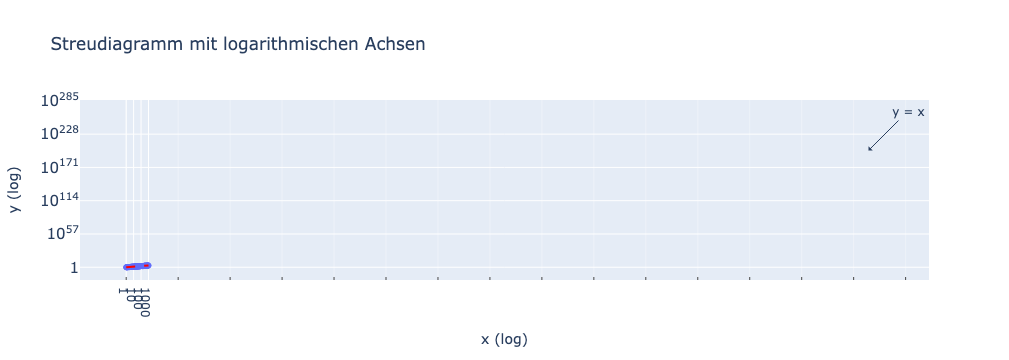

In [4]:
# Daten erstellen
np.random.seed(42)
n = 100
x = np.logspace(0, 3, n)  # Logarithmische Verteilung von 10^0 bis 10^3
y = x * (1 + 0.2 * np.random.normal(0, 1, n))  # Linear mit Rauschen

df = pd.DataFrame({'x': x, 'y': y})

# Streudiagramm erstellen
fig = px.scatter(
    df, 
    x='x', 
    y='y', 
    log_x=True,  # Logarithmische x-Achse
    log_y=True,  # Logarithmische y-Achse
    title='Streudiagramm mit logarithmischen Achsen',
    labels={'x': 'x (log)', 'y': 'y (log)'}
)

# Achsen anpassen
fig.update_xaxes(
    showexponent='all',
    exponentformat='power',
    minor=dict(ticks="inside", showgrid=True),
    tickvals=[1, 10, 100, 1000],  # Spezifische Tick-Positionen
)

fig.update_yaxes(
    showexponent='all',
    exponentformat='power',
    minor=dict(ticks="inside", showgrid=True)
)

# Trendlinie hinzufügen
fig.add_shape(
    type="line",
    x0=1, y0=1,
    x1=1000, y1=1000,
    line=dict(color="red", width=2, dash="dash")
)

fig.add_annotation(
    x=100, y=200,
    text="y = x",
    showarrow=True,
    arrowhead=1,
    ax=40,
    ay=-40
)

fig.show()

**Erklärung:**
- Mit `log_x=True` und `log_y=True` stellst du logarithmische Achsen ein
- `update_xaxes` und `update_yaxes` bieten spezifische Anpassungen für die jeweilige Achse
- `minor` ermöglicht die Anpassung von untergeordneten Tick-Markierungen
- `tickvals` legt die Positionen der Hauptmarkierungen fest

## 4 Legenden und Layouts

### Beispiel 1: Anpassung der Legende

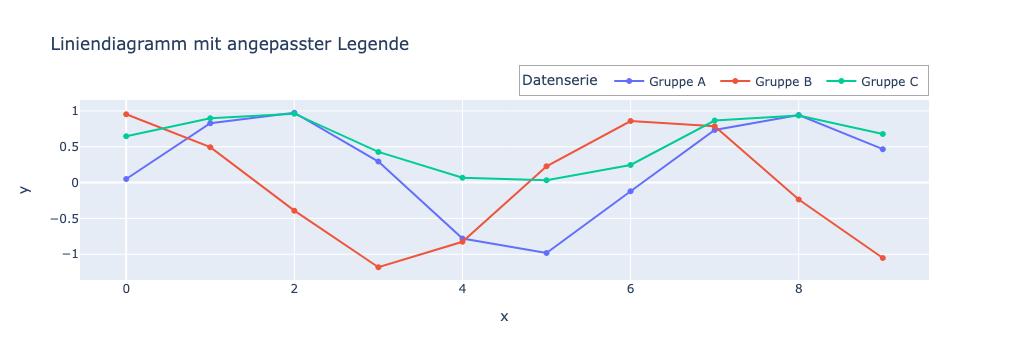

In [5]:
# Daten erstellen
np.random.seed(42)
kategorien = ['Gruppe A', 'Gruppe B', 'Gruppe C']
x = np.arange(10)
df = pd.DataFrame({
    'x': np.tile(x, len(kategorien)),
    'y': np.concatenate([
        np.sin(x) + np.random.normal(0, 0.1, len(x)),
        np.cos(x) + np.random.normal(0, 0.1, len(x)),
        0.5 * np.sin(x) + 0.5 + np.random.normal(0, 0.1, len(x))
    ]),
    'Gruppe': np.repeat(kategorien, len(x))
})

# Liniendiagramm mit angepasster Legende
fig = px.line(
    df, 
    x='x', 
    y='y', 
    color='Gruppe',
    title='Liniendiagramm mit angepasster Legende',
    markers=True
)

# Legende anpassen
fig.update_layout(
    legend=dict(
        title=dict(
            text="Datenserie",
            font=dict(size=14)
        ),
        orientation="h",  # Horizontale Ausrichtung
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1,
        bgcolor="rgba(255, 255, 255, 0.8)",
        bordercolor="darkgray",
        borderwidth=1,
        font=dict(size=12)
    )
)

fig.show()

**Erklärung:**
- Mit `legend` im `update_layout` kannst du die Legende anpassen
- `orientation="h"` ändert die Ausrichtung auf horizontal
- `y` und `x` legen die Position der Legende fest (0 bis 1)
- `yanchor` und `xanchor` bestimmen den Referenzpunkt der Legende
- Weitere Optionen steuern die Hintergrundfarbe, den Rand und die Schriftart

### Beispiel 2: Umfassende Layout-Anpassung

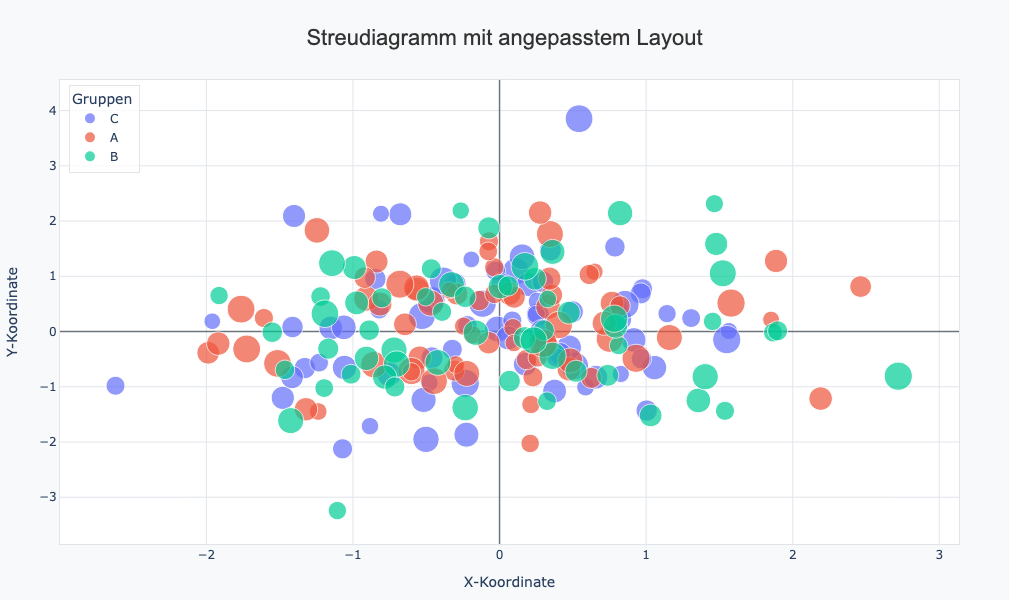

In [6]:
# Daten erstellen
np.random.seed(42)
n = 200
df = pd.DataFrame({
    'x': np.random.normal(0, 1, n),
    'y': np.random.normal(0, 1, n),
    'Größe': np.random.uniform(5, 15, n),
    'Gruppe': np.random.choice(['A', 'B', 'C'], n)
})

# Streudiagramm mit umfassender Layout-Anpassung
fig = px.scatter(
    df, 
    x='x', 
    y='y', 
    color='Gruppe',
    size='Größe',
    title='Streudiagramm mit umfassender Layout-Anpassung'
)

# Umfassende Layout-Anpassung
fig.update_layout(
    # Größe und Ränder
    width=800,
    height=600,
    margin=dict(l=50, r=50, t=80, b=50),
    
    # Hintergrund und Farben
    paper_bgcolor='#F8F9FA',  # Hintergrundfarbe der gesamten Figur
    plot_bgcolor='#FFFFFF',   # Hintergrundfarbe des Plotbereichs
    
    # Titel
    title=dict(
        text="Streudiagramm mit angepasstem Layout",
        font=dict(family="Arial, sans-serif", size=22, color="#333333"),
        x=0.5,
        y=0.95
    ),
    
    # Achsen
    xaxis=dict(
        title="X-Koordinate",
        showgrid=True,
        gridcolor='#E1E5EA',
        zeroline=True,
        zerolinecolor='#6C757D',
        zerolinewidth=1.5
    ),
    yaxis=dict(
        title="Y-Koordinate",
        showgrid=True,
        gridcolor='#E1E5EA',
        zeroline=True,
        zerolinecolor='#6C757D',
        zerolinewidth=1.5
    ),
    
    # Legende
    legend=dict(
        title="Gruppen",
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='#E1E5EA',
        borderwidth=1,
        x=0.01,
        y=0.99,
        xanchor='left',
        yanchor='top'
    ),
    
    # Hover-Modus
    hovermode='closest'
)

# Umrandung des Plotbereichs
fig.update_xaxes(showline=True, linewidth=1, linecolor='#E1E5EA', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='#E1E5EA', mirror=True)

fig.show()

**Erklärung:**
- `width` und `height` legen die Größe der gesamten Figur fest
- `margin` bestimmt die Abstände zum Rand (links, rechts, oben, unten)
- `paper_bgcolor` und `plot_bgcolor` steuern die Hintergrundfarben
- `hovermode` legt fest, wie Hover-Informationen angezeigt werden
- `showline`, `linewidth` und `linecolor` passen die Umrandung der Achsen an

## 5 Templates verwenden

### Was sind Templates?

Templates in Plotly sind vordefinierte Sätze von Stileinstellungen, die du auf deine Diagramme anwenden kannst. Sie bieten eine einfache Möglichkeit, das Erscheinungsbild deiner Visualisierungen konsistent zu gestalten, ohne alle Layoutdetails manuell festlegen zu müssen.

### Beispiel: Verschiedene Templates anwenden

Verfügbare Templates: ['ggplot2', 'seaborn', 'simple_white', 'plotly', 'plotly_white', 'plotly_dark', 'presentation', 'xgridoff', 'ygridoff', 'gridon', 'none']


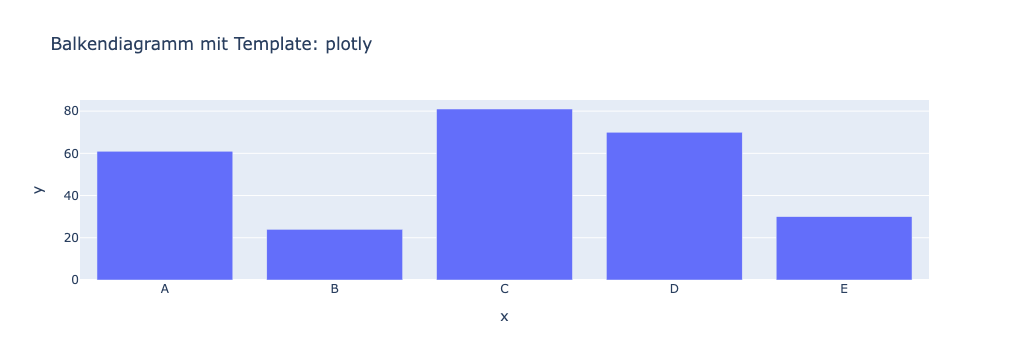

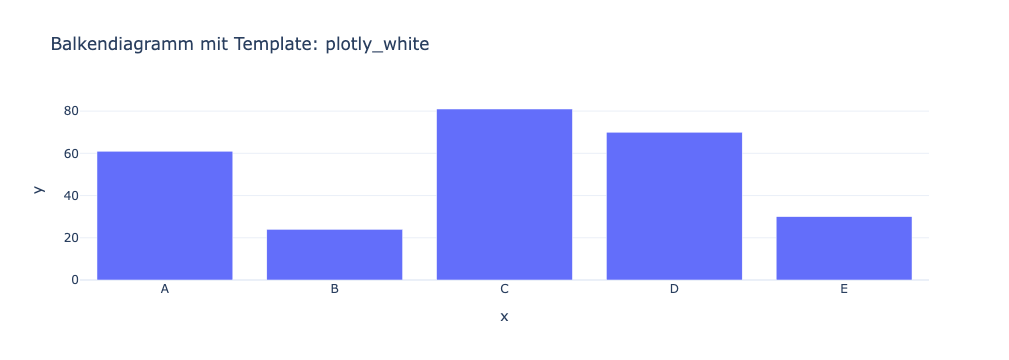

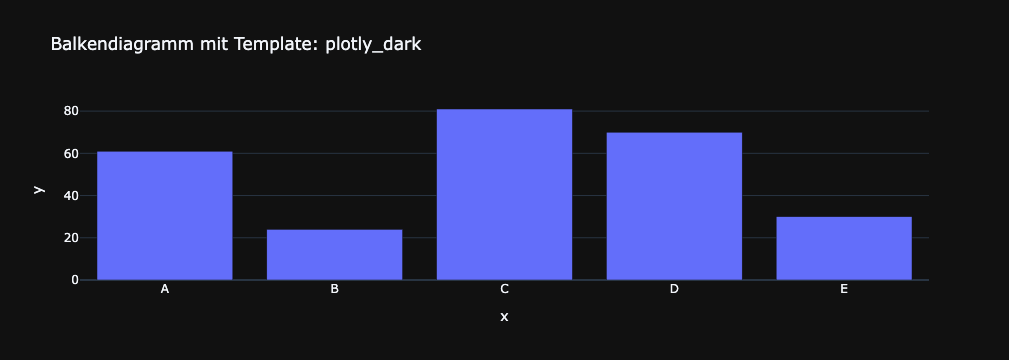

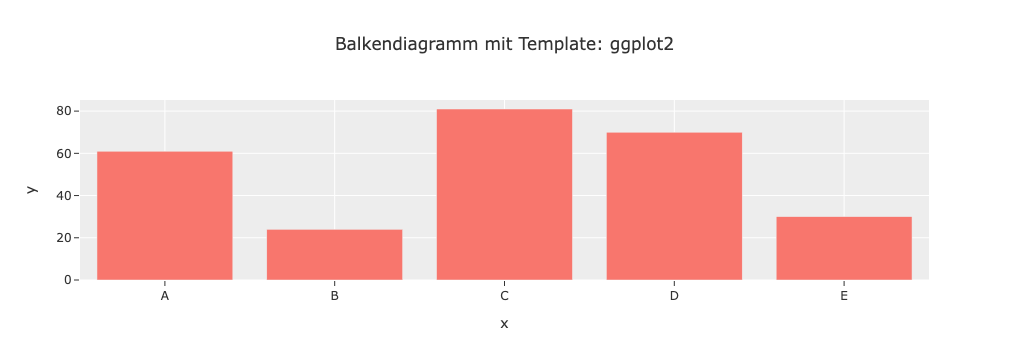

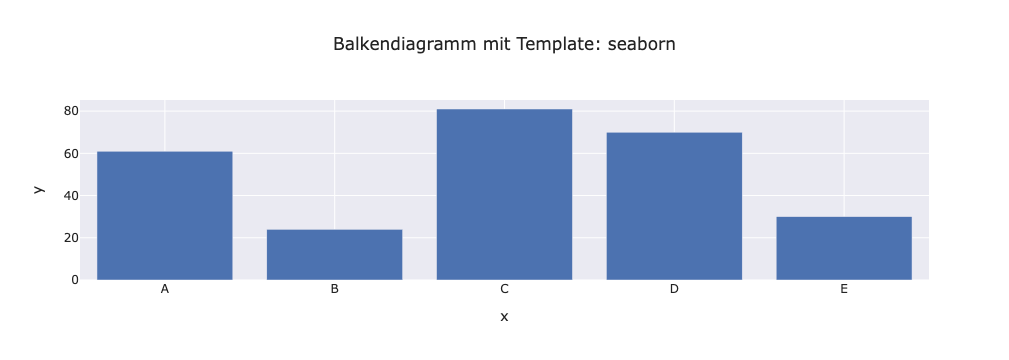

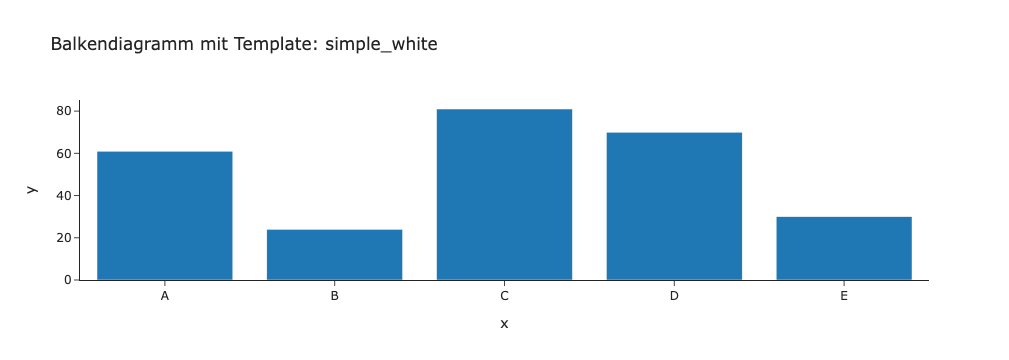

In [7]:
# Funktion zum Erstellen eines Standardplots
def create_sample_plot(template):
    # Daten erstellen
    np.random.seed(42)
    kategorien = ['A', 'B', 'C', 'D', 'E']
    werte = np.random.randint(10, 100, size=len(kategorien))
    
    # Balkendiagramm erstellen
    fig = px.bar(
        x=kategorien, 
        y=werte, 
        title=f'Balkendiagramm mit Template: {template}',
        template=template  # Template anwenden
    )
    
    return fig

# Verfügbare Templates anzeigen
import plotly.io as pio
print("Verfügbare Templates:", list(pio.templates))

# Einige Templates als Beispiel anwenden
templates = ['plotly', 'plotly_white', 'plotly_dark', 'ggplot2', 'seaborn', 'simple_white']

for template in templates:
    fig = create_sample_plot(template)
    fig.show()

**Erklärung:**
- Mit dem Parameter `template` kannst du ein vordefiniertes Template anwenden
- Verfügbare Templates sind u.a. 'plotly', 'plotly_white', 'plotly_dark', 'ggplot2', 'seaborn'
- Templates beeinflussen Farben, Schriftarten, Gitterlinien und andere visuelle Elemente
- Du kannst auch eigene Templates erstellen, indem du bestehende Templates anpasst

#### Aufgaben:

> (a) Erstelle ein ansprechendes Streudiagramm mit folgenden Anpassungen:
>- Generiere 200 zufällige Datenpunkte mit x, y, Größe und Kategorie (A, B, C)
>- Verwende eine benutzerdefinierte Farbpalette für die Kategorien
>- Füge eine passende Anmerkung hinzu, die auf ein interessantes Datenmuster hinweist
>- Passe Achsen, Titel, Legende und Layout so an, dass das Diagramm professionell wirkt
>- Verwende ein passendes Template als Basis

In [ ]:
# Deine Lösung:





#### Lösung:

In [ ]:
# Daten generieren
np.random.seed(42)
n = 200

# Drei Cluster erstellen
cluster_centers = [(-2, -2), (0, 0), (2, 2)]
cluster_std = [0.5, 0.7, 0.3]
labels = ['A', 'B', 'C']

x = []
y = []
categories = []

for i, (center_x, center_y) in enumerate(cluster_centers):
    cluster_size = n // 3
    if i == len(cluster_centers) - 1:
        cluster_size += n % 3  # Restliche Punkte dem letzten Cluster zuweisen
    
    x_cluster = np.random.normal(center_x, cluster_std[i], cluster_size)
    y_cluster = np.random.normal(center_y, cluster_std[i], cluster_size)
    
    x.extend(x_cluster)
    y.extend(y_cluster)
    categories.extend([labels[i]] * cluster_size)

# Größen basierend auf der Entfernung vom Ursprung
distances = np.sqrt(np.array(x)**2 + np.array(y)**2)
sizes = 5 + 10 * (distances / distances.max())

df = pd.DataFrame({
    'x': x,
    'y': y,
    'Kategorie': categories,
    'Größe': sizes
})

# Benutzerdefinierte Farbpalette
colors = {
    'A': '#1f77b4',  # Blau
    'B': '#ff7f0e',  # Orange
    'C': '#2ca02c'   # Grün
}

# Streudiagramm erstellen
fig = px.scatter(
    df,
    x='x',
    y='y',
    color='Kategorie',
    size='Größe',
    color_discrete_map=colors,
    title='Clusteranalyse der Datenpunkte',
    labels={'x': 'X-Koordinate', 'y': 'Y-Koordinate', 'Größe': 'Entfernung vom Ursprung'},
    template='plotly_white'  # Sauberes, professionelles Template
)

# Layout anpassen
fig.update_layout(
    title={
        'text': 'Clusteranalyse mit drei distinkten Gruppen',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=20, color='#333333')
    },
    legend=dict(
        title=dict(text='Cluster', font=dict(size=14)),
        bordercolor='#E5ECF6',
        borderwidth=1,
        bgcolor='rgba(255,255,255,0.9)'
    ),
    xaxis=dict(
        title=dict(text='X-Koordinate', font=dict(size=14)),
        showgrid=True,
        gridcolor='#E5ECF6',
        zeroline=True,
        zerolinecolor='gray',
        zerolinewidth=1
    ),
    yaxis=dict(
        title=dict(text='Y-Koordinate', font=dict(size=14)),
        showgrid=True,
        gridcolor='#E5ECF6',
        zeroline=True,
        zerolinecolor='gray',
        zerolinewidth=1
    ),
    margin=dict(l=40, r=40, t=80, b=40),
    plot_bgcolor='white'
)

# Anmerkungen hinzufügen
fig.add_annotation(
    x=0, y=0,
    text="Zentrum des Clusters B",
    showarrow=True,
    arrowhead=2,
    arrowcolor="#ff7f0e",
    ax=20,
    ay=-30
)

fig.add_annotation(
    x=-2, y=-2,
    text="Kompaktes Cluster A",
    showarrow=True,
    arrowhead=2,
    arrowcolor="#1f77b4",
    ax=-40,
    ay=30
)

fig.add_annotation(
    x=2, y=2,
    text="Dichtes Cluster C",
    showarrow=True,
    arrowhead=2,
    arrowcolor="#2ca02c",
    ax=30,
    ay=40
)

# Formen hinzufügen: Kreise um die Cluster-Zentren
for i, (center_x, center_y) in enumerate(cluster_centers):
    fig.add_shape(
        type="circle",
        xref="x", yref="y",
        x0=center_x - 1.5*cluster_std[i],
        y0=center_y - 1.5*cluster_std[i],
        x1=center_x + 1.5*cluster_std[i],
        y1=center_y + 1.5*cluster_std[i],
        line_color=list(colors.values())[i],
        line_width=1,
        fillcolor=f"rgba({','.join(map(str, [int(list(colors.values())[i][1:3], 16), int(list(colors.values())[i][3:5], 16), int(list(colors.values())[i][5:7], 16)]))}, 0.1)"
    )

fig.show()

**Erklärung der Lösung:**
- Wir erstellen drei verschiedene Cluster mit unterschiedlichen Zentren und Streuungen
- Jedes Cluster bekommt eine eigene Farbe aus unserer benutzerdefinierten Farbpalette
- Die Größe der Punkte basiert auf ihrer Entfernung vom Ursprung
- Das 'plotly_white'-Template bietet eine saubere, professionelle Basis
- Wir fügen Anmerkungen hinzu, die auf die Besonderheiten jedes Clusters hinweisen
- Mit Kreisen heben wir die Cluster-Bereiche zusätzlich hervor
- Alle Layoutelemente werden angepasst, um ein kohärentes und professionelles Erscheinungsbild zu erzielen

## Zusammenfassung

In diesem Kapitel hast du gelernt, wie du Plotly-Diagramme anpassen und verbessern kannst. Die wichtigsten Punkte waren:

- Die Anpassung von Farben und Farbschemata, sowohl für diskrete als auch für kontinuierliche Daten
- Das Hinzufügen von informativen Anmerkungen und Formen, um wichtige Aspekte hervorzuheben
- Die Formatierung von Achsen und Titeln für bessere Lesbarkeit und Verständnis
- Die Anpassung von Legenden und Layouts für ein professionelles Erscheinungsbild
- Die Verwendung von Templates für konsistentes Styling

Mit diesen Techniken kannst du aussagekräftige und visuell ansprechende Visualisierungen erstellen, die deine Daten optimal präsentieren und dem Betrachter wichtige Einblicke vermitteln.